# Emerging Technology Coding Challenge

In [850]:
"""
import all the libraries required
"""
import cv2
import dlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from scipy import interpolate
from pylab import *
from skimage import color
from imutils import face_utils
import imutils
import math

import pickle
import os.path
import io

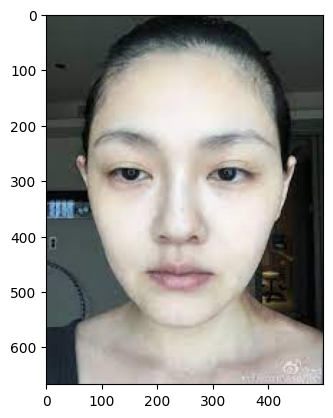

In [851]:
#讀取cv2.IMREAD_COLOR彩色圖片(忽略透明度)，將RGB皆保留
image = cv2.imread('123.JPG', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#############調整圖片大小#############

# 調整圖片大小
image = imutils.resize(image, width=500)

#顯示影像
#%matplotlib notebook
%matplotlib inline
plt.imshow(image)
plt.show()

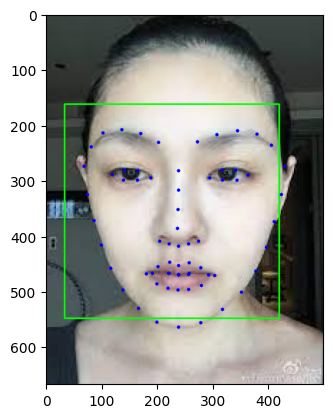

In [852]:
#############調整圖片大小#############

# 調整圖片大小
image = imutils.resize(image, width=500)
#############轉換pic為灰階#############

# 將彩色圖片轉為灰階
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#############使用HOG人臉檢測器檢測人臉#############

#初始化 HOG 人臉檢測器
hog_face_detector = dlib.get_frontal_face_detector()

#############使用Dlib獲取面部特徵點#############

#使用Dlib載入68個臉部特徵點的面部形狀預測器，這些點構成人臉的形狀
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

#hog_face_detector(轉為灰階的原始圖,1)應用一層圖像金字塔(尺度不變性技術，在不同尺寸上搜索人臉)
#faces會包含檢測到的人臉位置(Dlib)，每一個元素都包含一個矩形
faces = hog_face_detector(image, 1)

for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()

    # 在影像中繪製人臉方框
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 使用特徵點檢測器獲取特徵點
    landmarks = predictor(image, face)

    # 繪製特徵點
    for i in range(68):  # 68是預設的特徵點數量
        cv2.circle(image, (landmarks.part(i).x, landmarks.part(i).y), 3, (0, 0, 255), -1)

#顯示處理後的影像
%matplotlib inline
plt.imshow(image)
plt.show()



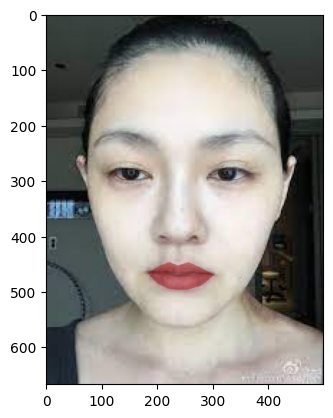

In [853]:
#讀取cv2.IMREAD_COLOR彩色圖片(忽略透明度)，將RGB皆保留
image = cv2.imread('123.JPG', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#############調整圖片大小#############

# 調整圖片大小
image = imutils.resize(image, width=500)

#############轉換pic為灰階#############

# 將彩色圖片轉為灰階
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#############使用HOG人臉檢測器檢測人臉#############

#獲取Histogram of Oriented Gradients(HOG)人臉檢測器的結果
hog_face_detector = dlib.get_frontal_face_detector()

#hog_face_detector(轉為灰階的原始圖,1)應用一層圖像金字塔(尺度不變性技術，在不同尺寸上搜索人臉)
#faces會包含檢測到的人臉位置(Dlib)，每一個元素都包含一個矩形
faces = hog_face_detector(gray, 1)

# cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

# in case using CNN detector, use following line of code

# faces = cnn_face_detector(gray, 1)

#############使用Dlib獲取面部特徵點#############

#使用Dlib載入68個臉部特徵點的面部形狀預測器，這些點構成人臉的形狀
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# faces是一個list，faces[0]取得第一張人臉位置(矩形左上角和右下角的座標)
shape = predictor(gray, faces[0])
#將形狀對象轉換為numpy陣列
shape = face_utils.shape_to_np(shape)

pil_image = Image.fromarray(image)

#############在pic上繪製嘴唇和眼妝#############

#將shape(numpy)轉換成list
shape = shape.tolist()

#遍歷list，調整座標格式
for i,j in enumerate(shape):
    #分別將每個座標的x,y分別提出，並存入shape[]
    shape[i] = (j[0], j[1])

# 根據特定索引，選取對應的特徵點
#上嘴唇(top_lip)
indices = [48,49,50,51,52,53,54,64,63,62,61,60,48]
top_lip = [shape[i] for i in indices]

#下嘴唇(bottom_lip)
indices = [48,60,67,66,65,64,54,55,56,57,58,59,48]
bottom_lip = [shape[i] for i in indices]

#左眼(left_eye)
indices = [36,37,38,39,40,41,36]
left_eye = [shape[i] for i in indices]

#右眼(right_eye)
indices = [42,43,44,45,46,47,42]
right_eye = [shape[i] for i in indices]

#############在pic上繪製嘴唇和眼妝#############

#使用RGBA色彩模式，R紅色、G綠色、B藍色、A透明度
d = ImageDraw.Draw(pil_image, 'RGBA')
#繪製上唇的多邊形，座標(top_lip)，fill(填充多邊形的填充顏色)、透明度100
d.polygon(top_lip, fill=(163,0,0,100))
#繪製下唇的多邊形，座標(bottom_lip)，fill(填充多邊形的填充顏色)、透明度100
d.polygon(bottom_lip, fill=(163,0,0,100))
#繪製左眼的線條，座標(left_eye)，fill(填充多邊形的填充顏色)、透明度150
d.line(left_eye, fill=(119, 47, 26, 150), width=2)
#繪製右眼的線條，座標(right_eye)，fill(填充多邊形的填充顏色)、透明度150
d.line(right_eye, fill=(119, 47, 26, 150), width=2)
   
#顯示處理後的影像
#%matplotlib notebook
%matplotlib inline
plt.imshow(pil_image)
plt.show()



In [854]:
#將PIL影像轉換為Numpy陣列
pil_image = np.asarray(pil_image)
#獲取影像height和width
height, width = pil_image.shape[:2]
#定義腮紅強度
intensity = 0.1
#建立原始影像的副本
imOrg = pil_image.copy()

#獲取腮紅邊界範圍
def get_boundary_points(x, y):
    #interpolate針對給定的x,y座標進行樣條插值(在給定點之間生成平滑的點)，為了獲取多邊形的邊界
    tck, u = interpolate.splprep([x, y], s=0, per=1)
    #np.linspace()生成一系列均勻分布的數值，用於在給定的插值區間內生成更多的點
    unew = np.linspace(u.min(), u.max(), 1000)
    #根據新的參數範圍(unew)和樣條插值(tck)，得到新的座標
    xnew, ynew = interpolate.splev(unew, tck, der=0)
    #將x,y座標轉換為整數，並組合成一個二維矩陣
    tup = c_[xnew.astype(int), ynew.astype(int)].tolist()
    #set取除重複的座標點
    coord = list(set(tuple(map(tuple, tup))))
    #轉換為numpy陣列
    coord = np.array([list(elem) for elem in coord])
    #回傳經過處裡的x,y座標，這些座標給定了多邊形範圍的邊界點
    return np.array(coord[:, 0], dtype=np.int32), np.array(coord[:, 1], dtype=np.int32)

#獲取腮紅邊界範圍
def get_interior_points(x, y):
    #初始化
    intx = []
    inty = []
    
    #在給定範圍[a,b]內填充x座標，i作為對應的y座標
    def ext(a, b, i):
        #round 將座標做四捨五入
        a, b = round(a), round(b)
        #arange 生成從a到b的整數範圍
        intx.extend(arange(a, b, 1).tolist())
        #生成相應長度的單位
        inty.extend((ones(b - a) * i).tolist())
    #獲取x,y的陣列
    x, y = np.array(x), np.array(y)
    #獲取x的最小值和最大值
    xmin, xmax = amin(x), amax(x)
    #生成x的範圍
    xrang = np.arange(xmin, xmax + 1, 1)
    #遍歷x的範圍，獲取對應的y座標
    for i in xrang:
        ylist = y[where(x == i)]
        ext(amin(ylist), amax(ylist), i)
    #返回獲取的內部點x,y座標
    return np.array(intx, dtype=np.int32), np.array(inty, dtype=np.int32)

#腮紅顏色
def apply_blush_color(r, g, b):
    global pil_image
    
    val = color.rgb2lab((pil_image / 255.)).reshape(width * height, 3)
    #print("Before - L: {:.2f}, A: {:.2f}, B: {:.2f}".format(mean(val[:, 0]), mean(val[:, 1]), mean(val[:, 2])))
    #計算L、A、B通道的平均值
    L, A, B = mean(val[:, 0]), mean(val[:, 1]), mean(val[:, 2])
    #將輸入的(r,g,b)轉換為LAB色彩空間的值
    L1, A1, B1 = color.rgb2lab(np.array((r / 255., g / 255., b / 255.)).reshape(1, 1, 3)).reshape(3, )
    #根據腮紅的顏色和強度進行調整
    ll, aa, bb = (L1 - L) * intensity, (A1 - A) * intensity, (B1 - B) * intensity
    #print("After- L: {:.2f}, A: {:.2f}, B: {:.2f}".format(L + ll, A + aa, B + bb))

    # 調整亮度，可以根據需要調整係數
    #將調整後的顏色應用到LAB色彩空間
    #np.clip僵直限制在合理的範圍內
    val[:, 0] = np.clip(val[:, 0] + ll, 0, 100)
    val[:, 1] = np.clip(val[:, 1] + aa, -127, 128)
    val[:, 2] = np.clip(val[:, 2] + bb, -127, 128)
    
    #將調整後的LAB彩色空間轉換回RGB色彩空間，並將像素值重新縮放
    pil_image = color.lab2rgb(val.reshape(height, width, 3)) * 255

#定義平滑處裡
def smoothen_blush(x, y):
    #imOrg 代表原始的圖像
    global imOrg

    #創建一個與原始圖像相同大小的二維陣列，用於表示基礎圖像(存腮紅的形狀)
    imgBase = zeros((height, width))

    # fillConvexPoly根據提供的x,y座標，填充腮紅
    cv2.fillConvexPoly(imgBase, np.array(c_[x, y], dtype='int32'), 1)
    
    # GaussianBlur 對腮紅形狀進行模糊處理(讓它看起來更加自然)，模糊半徑(51,51)
    imgMask = cv2.GaussianBlur(imgBase, (51, 51), 0)
    
    imgBlur3D = np.ndarray([height, width, 3], dtype='float')
    imgBlur3D[:, :, 0] = imgMask
    imgBlur3D[:, :, 1] = imgMask
    imgBlur3D[:, :, 2] = imgMask

    
    # 使用遮罩將模糊腮紅形狀與原始圖像混合，以實現平滑的效果
    imOrg = (imgBlur3D * pil_image + (1 - imgBlur3D) * imOrg).astype('uint8')

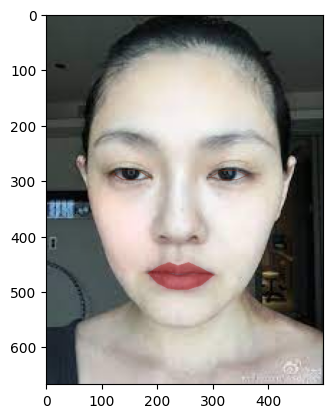

In [855]:
#############繪製左臉頰的腮紅#############

# 選擇左臉頰區域的索引(之前的臉部特徵檢測和形狀預測中獲取的)
indices = [1,2,3,4,48,31,36]
#提取左臉頰區域的x,y座標，構成左臉頰區域的形狀
left_cheek_x = [shape[i][0] for i in indices]
left_cheek_y = [shape[i][1] for i in indices]

# 獲取腮紅區域的邊界點
left_cheek_x, left_cheek_y = get_boundary_points(left_cheek_x, left_cheek_y)

#獲取腮紅區域內部的所有像素點
left_cheek_y, left_cheek_x = get_interior_points(left_cheek_x, left_cheek_y)

apply_blush_color(239., 71., 111.)

# 平滑處理腮紅效果
smoothen_blush(left_cheek_x, left_cheek_y)

#顯示處理後的影像
#%matplotlib notebook
%matplotlib inline
plt.imshow(imOrg)
plt.show()

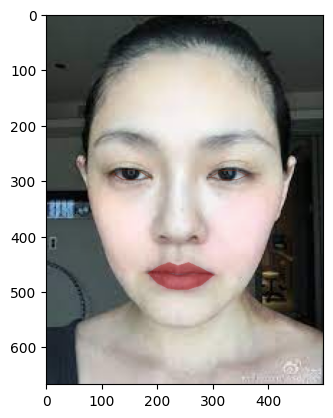

In [856]:
#############繪製右臉頰的腮紅#############

# 選擇右臉頰區域的索引(之前的臉部特徵檢測和形狀預測中獲取的)
indices = [15,14,13,12,54,35,45]
#提取右臉頰區域的x,y座標，構成右臉頰區域的形狀
right_cheek_x = [shape[i][0] for i in indices]
right_cheek_y = [shape[i][1] for i in indices]

# 獲取腮紅區域的邊界點
right_cheek_x, right_cheek_y = get_boundary_points(right_cheek_x, right_cheek_y)

#獲取腮紅區域內部的所有像素點
right_cheek_y, right_cheek_x = get_interior_points(right_cheek_x, right_cheek_y)

# 應用腮紅顏色
#apply_blush_color(239., 71., 111.)
apply_blush_color(110., 71., 111.)

# 平滑處理腮紅效果
smoothen_blush(right_cheek_x, right_cheek_y)

#顯示處理後的影像
#%matplotlib notebook
%matplotlib inline
plt.imshow(imOrg)
plt.show()

In [857]:
#將PIL影像轉換為Numpy陣列
pil_image = np.asarray(pil_image)
#獲取影像height和width
height, width = pil_image.shape[:2]
#定義腮紅強度
intensity = 0.1
#建立原始影像的副本
imOrg = imOrg.copy()

def get_boundary_points(x, y):
    if len(x) < 2 or len(y) < 2:
            return np.array([], dtype=np.int32), np.array([], dtype=np.int32)
    
    tck, u = interpolate.splprep([x, y], s=0.5, per=0)
    unew = np.linspace(u.min(), u.max(), 1000)
    xnew, ynew = interpolate.splev(unew, tck, der=0)
    tup = c_[xnew.astype(int), ynew.astype(int)].tolist()
    coord = list(set(tuple(map(tuple, tup))))
    coord = np.array([list(elem) for elem in coord])
    return np.array(coord[:, 0], dtype=np.int32), np.array(coord[:, 1], dtype=np.int32)

def get_interior_points(x, y):
    intx, inty = [], []
    
    def ext(a, b, i):
        a, b = round(a), round(b)
        intx.extend(arange(a, b, 1).tolist())
        inty.extend((ones(b - a) * i).tolist())

    if len(x) == 0 or len(y) == 0:
        return np.array([], dtype=np.int32), np.array([], dtype=np.int32)

    x, y = np.array(x), np.array(y)
    xmin, xmax = amin(x), amax(x)
    xrang = np.arange(xmin, xmax + 1, 1)
    for i in xrang:
        ylist = y[where(x == i)]
        ext(amin(ylist), amax(ylist), i)

    return np.array(intx, dtype=np.int32), np.array(inty, dtype=np.int32)

#眉毛顏色
def apply_eyebrow_color(image, eyebrow_x, eyebrow_y, r, g, b, intensity):
    val = color.rgb2lab((image / 255.)).reshape(image.shape[0] * image.shape[1], 3)

    # 計算L、A、B通道的平均值
    L, A, B = np.mean(val[:, 0]), np.mean(val[:, 1]), np.mean(val[:, 2])

    # 將輸入的(r,g,b)轉換為LAB色彩空間的值
    L1, A1, B1 = color.rgb2lab(np.array((r / 255., g / 255., b / 255.)).reshape(1, 1, 3)).reshape(3, )

    # 根據眉毛的顏色和強度進行調整
    ll, aa, bb = (L1 - L) * intensity, (A1 - A) * intensity, (B1 - B) * intensity

    # 將調整後的顏色應用到LAB色彩空間
    val[:, 0] = np.clip(val[:, 0] + ll, 0, 100)
    val[:, 1] = np.clip(val[:, 1] + aa, -128, 127)
    val[:, 2] = np.clip(val[:, 2] + bb, -128, 127)

    # 將調整後的LAB彩色空間轉換回RGB色彩空間，並將像素值重新縮放
    result_image = (color.lab2rgb(val.reshape(image.shape)) * 255).astype('uint8')

    # 使用繪圖函數繪製眉毛效果
    for i in range(len(eyebrow_x)):
        result_image[eyebrow_y[i], eyebrow_x[i]] = [r, g, b]

    return result_image

# 定義平滑處理
def smoothen_eyebrow(x, y, image):
    imgBase = np.zeros((image.shape[0], image.shape[1]))

    cv2.fillConvexPoly(imgBase, np.array(c_[x, y], dtype='int32'), 1)

    # 使用雙邊濾波進行平滑處理
    imgBlur = cv2.bilateralFilter(imgBase.astype('uint8'), 35, 200, 200)

    imgBlur3D = np.repeat(imgBlur[:, :, np.newaxis], 3, axis=2)

    result_image = (imgBlur3D * image + (1 - imgBlur3D) * image).astype('uint8')

    return result_image

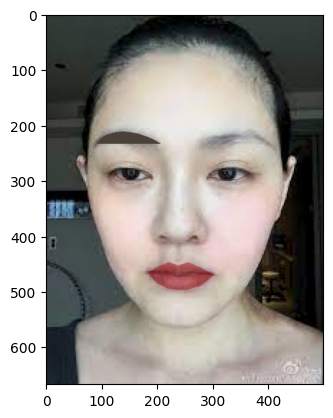

In [858]:
#############繪製左眉毛#############

# 選擇左眉毛區域的索引(之前的臉部特徵檢測和形狀預測中獲取的)
indices = [17, 18, 19, 20, 21]

#提取右眉毛區域的x,y座標，構成右臉頰區域的形狀
left_eyebrow_y = [shape[i][0]+5 for i in indices]
left_eyebrow_x = [shape[i][1]+5 for i in indices]


left_eyebrow_x, left_eyebrow_y = get_boundary_points(left_eyebrow_x, left_eyebrow_y)
#獲取腮紅區域內部的所有像素點
left_eyebrow_x, left_eyebrow_y = get_interior_points(left_eyebrow_x, left_eyebrow_y)

# 使用眉毛顏色
processed_image = apply_eyebrow_color(imOrg, left_eyebrow_x, left_eyebrow_y, 74., 66., 56., 0.1)

# 平滑處理眉毛效果
processed_image = smoothen_eyebrow(left_eyebrow_x, left_eyebrow_y, processed_image)

#顯示處理後的影像
#%matplotlib notebook
plt.imshow(processed_image)
#plt.imshow(gray, cmap='gray')
plt.show()

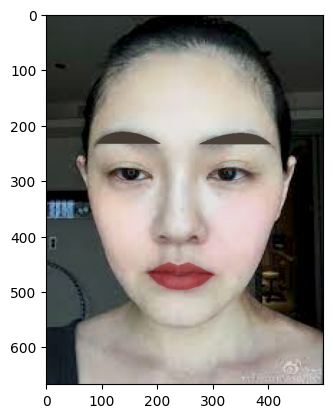

In [859]:
#############繪製左眉毛#############
# 選擇右眉毛頰區域的索引(之前的臉部特徵檢測和形狀預測中獲取的)
indices = [22,23,24,25,26]
#提取右眉毛區域的x,y座標，構成右臉頰區域的形狀
#提取右眉毛區域的x,y座標，構成右臉頰區域的形狀
right_eyebrow_y = [shape[i][0]+5 for i in indices]
right_eyebrow_x = [shape[i][1]+5 for i in indices]


right_eyebrow_x, right_eyebrow_y = get_boundary_points(right_eyebrow_x, right_eyebrow_y)
#獲取腮紅區域內部的所有像素點
right_eyebrow_x, right_eyebrow_y = get_interior_points(right_eyebrow_x, right_eyebrow_y)

# 使用眉毛顏色
processed_image = apply_eyebrow_color(processed_image, right_eyebrow_x, right_eyebrow_y, 74., 66., 56., 0.1)

# 平滑處理眉毛效果
processed_image = smoothen_eyebrow(right_eyebrow_x, right_eyebrow_y, processed_image)

#顯示處理後的影像
#%matplotlib notebook
plt.imshow(processed_image)
#plt.imshow(gray, cmap='gray')

plt.show()

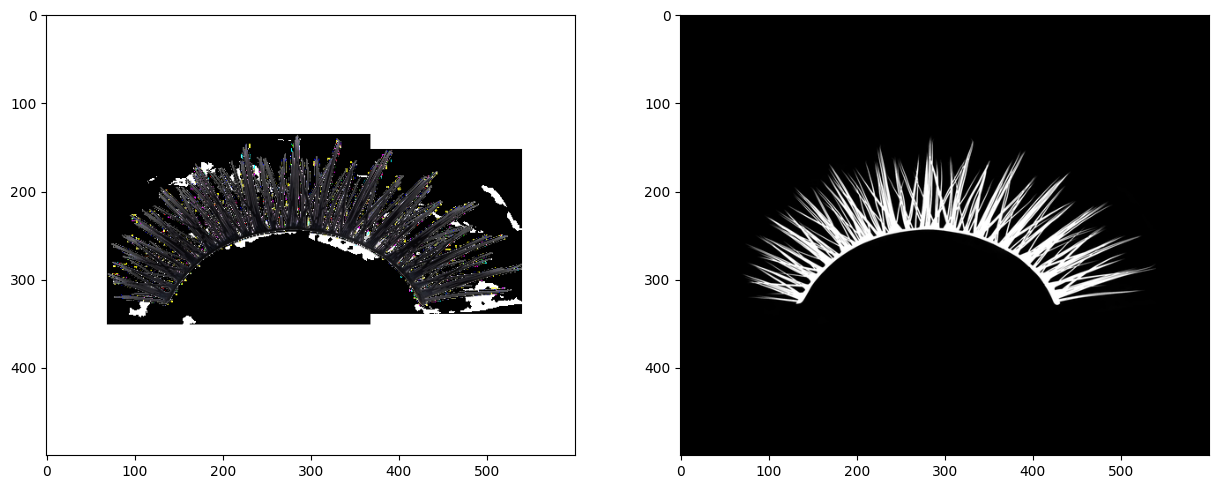

In [860]:
# Load the eyelash image with alpha mask
overlayFile = "eyelash.png"
imgWithMask = cv2.imread(overlayFile, cv2.IMREAD_UNCHANGED)

b, g, r, a = cv2.split(imgWithMask)

eye_lashes = cv2.merge((r, g, b))
eye_lashes = np.float32(eye_lashes)/255

eye_lashesAlphaMask = cv2.merge((a, a, a))
eye_linerAlphaMask = np.float32(eye_lashesAlphaMask)

plt.figure(figsize=[15, 10])
plt.subplot(121)
plt.imshow(eye_lashes)
plt.subplot(122)
plt.imshow(np.uint8(eye_lashesAlphaMask))

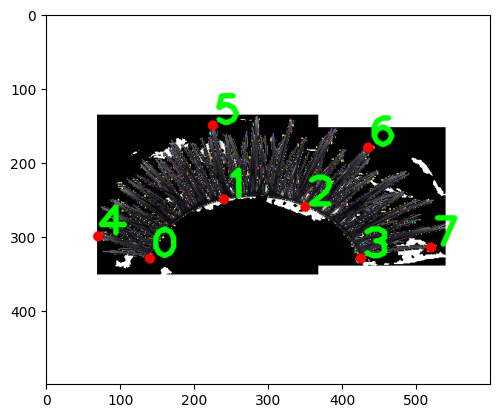

In [861]:
eye_lashes2 = cv2.merge((b, g, r)) 

# 左眼睫毛选中的索引
selectedIndex_left = [36, 37, 38, 39]  

# 右眼睫毛选中的索引  
selectedIndex_right = [42, 43, 44, 45]

# 眼睫毛特征点坐标
eye_lashes_points = [(140, 330), (240, 250), (350, 260), (425, 330),  
                    (70, 300), (225, 150), (435, 180), (520, 315)]

for index, eye_p in enumerate(eye_lashes_points):
   # 在特征点画圆
   cv2.circle(eye_lashes2, (eye_p[0], eye_p[1]), 7, (0, 0, 255), -1)  
   
   # 写索引数字
   cv2.putText(eye_lashes2, str(index), (eye_p[0], eye_p[1]),  
               1, 4, (0, 255, 0), 5, cv2.LINE_AA)
   
# 颜色通道需要翻转    
plt.imshow(eye_lashes2[..., ::-1])

In [862]:
# Returns 8 points on the boundary of a rectangle
def getEightBoundaryPoints(h, w):
  boundaryPts = []
  boundaryPts.append((0,0))
  boundaryPts.append((w/2, 0))
  boundaryPts.append((w-1,0))
  boundaryPts.append((w-1, h/2))
  boundaryPts.append((w-1, h-1))
  boundaryPts.append((w/2, h-1))
  boundaryPts.append((0, h-1))
  boundaryPts.append((0, h/2))
  return np.array(boundaryPts, dtype=np.float)


# Constrains points to be inside boundary
def constrainPoint(p, w, h):
  p = (min(max(p[0], 0), w - 1), min(max(p[1], 0), h - 1))
  return p

# convert Dlib shape detector object to list of tuples
def dlibLandmarksToPoints(shape):
  points = []
  for p in shape.parts():
    pt = (p.x, p.y)
    points.append(pt)
  return points

# Compute similarity transform given two sets of two points.
# OpenCV requires 3 pairs of corresponding points.
# We are faking the third one.
def similarityTransform(inPoints, outPoints):
  s60 = math.sin(60*math.pi/180)
  c60 = math.cos(60*math.pi/180)

  inPts = np.copy(inPoints).tolist()
  outPts = np.copy(outPoints).tolist()

  # The third point is calculated so that the three points make an equilateral triangle
  xin = c60*(inPts[0][0] - inPts[1][0]) - s60*(inPts[0][1] - inPts[1][1]) + inPts[1][0]
  yin = s60*(inPts[0][0] - inPts[1][0]) + c60*(inPts[0][1] - inPts[1][1]) + inPts[1][1]

  inPts.append([np.int(xin), np.int(yin)])

  xout = c60*(outPts[0][0] - outPts[1][0]) - s60*(outPts[0][1] - outPts[1][1]) + outPts[1][0]
  yout = s60*(outPts[0][0] - outPts[1][0]) + c60*(outPts[0][1] - outPts[1][1]) + outPts[1][1]

  outPts.append([np.int(xout), np.int(yout)])

  # Now we can use estimateRigidTransform for calculating the similarity transform.
  tform = cv2.estimateRigidTransform(np.array([inPts]), np.array([outPts]), False)
  return tform

# Normalizes a facial image to a standard size given by outSize.
# Normalization is done based on Dlib's landmark points passed as pointsIn
# After normalization, left corner of the left eye is at (0.3 * w, h/3 )
# and right corner of the right eye is at ( 0.7 * w, h / 3) where w and h
# are the width and height of outSize.
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w = outSize

  # Corners of the eye in input image
  eyecornerSrc = [pointsIn[36], pointsIn[45]]

  # Corners of the eye in normalized image
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)), 
                  (np.int(0.7 * w), np.int(h/3))]

  # Calculate similarity transform
  tform = similarityTransform(eyecornerSrc, eyecornerDst)
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Apply similarity transform to input image
  imOut = cv2.warpAffine(imIn, tform, (w, h))

  # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
  points2 = np.reshape(pointsIn, (pointsIn.shape[0], 1, pointsIn.shape[1]))
  
  # Apply similarity transform to landmarks
  pointsOut = cv2.transform(points2, tform)

  # reshape pointsOut to numLandmarks x 2
  pointsOut = np.reshape(pointsOut, (pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut

# find the point closest to an array of points
# pointsArray is a Nx2 and point is 1x2 ndarray
def findIndex(pointsArray, point):
  dist = np.linalg.norm(pointsArray-point, axis=1)
  minIndex = np.argmin(dist)
  return minIndex


# Check if a point is inside a rectangle
def rectContains(rect, point):
  if point[0] < rect[0]:
    return False
  elif point[1] < rect[1]:
    return False
  elif point[0] > rect[2]:
    return False
  elif point[1] > rect[3]:
    return False
  return True


# Calculate Delaunay triangles for set of points
# Returns the vector of indices of 3 points for each triangle
def calculateDelaunayTriangles(rect, points):

  # Create an instance of Subdiv2D
  subdiv = cv2.Subdiv2D(rect)

  # Insert points into subdiv
  for p in points:
    subdiv.insert((p[0], p[1]))

  # Get Delaunay triangulation
  triangleList = subdiv.getTriangleList()

  # Find the indices of triangles in the points array
  delaunayTri = []

  for t in triangleList:
    # The triangle returned by getTriangleList is
    # a list of 6 coordinates of the 3 points in
    # x1, y1, x2, y2, x3, y3 format.
    # Store triangle as a list of three points
    pt = []
    pt.append((t[0], t[1]))
    pt.append((t[2], t[3]))
    pt.append((t[4], t[5]))

    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
      # Variable to store a triangle as indices from list of points
      ind = []
      # Find the index of each vertex in the points list
      for j in range(0, 3):
        for k in range(0, len(points)):
          if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
            ind.append(k)
        # Store triangulation as a list of indices
      if len(ind) == 3:
        delaunayTri.append((ind[0], ind[1], ind[2]))

  return delaunayTri

# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size):

  # Given a pair of triangles, find the affine transform.
  warpMat = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))

  # Apply the Affine Transform just found to the src image
  dst = cv2.warpAffine(src, warpMat, (size[0], size[1]), None,
             flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

  return dst

# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2):
  # Find bounding rectangle for each triangle
  r1 = cv2.boundingRect(np.float32([t1]))
  r2 = cv2.boundingRect(np.float32([t2]))

  # Offset points by left top corner of the respective rectangles
  t1Rect = []
  t2Rect = []
  t2RectInt = []

  for i in range(0, 3):
    t1Rect.append(((t1[i][0] - r1[0]), (t1[i][1] - r1[1])))
    t2Rect.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))
    t2RectInt.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))

  # Get mask by filling triangle
  mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
  cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0)

  # Apply warpImage to small rectangular patches
  img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

  size = (r2[2], r2[3])

  img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)

  img2Rect = img2Rect * mask

  # Copy triangular region of the rectangular patch to the output image
  img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ((1.0, 1.0, 1.0) - mask)
  img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Rect

# detect facial landmarks in image
def getLandmarks(faceDetector, landmarkDetector, im, FACE_DOWNSAMPLE_RATIO = 1):
  points = []
  imSmall = cv2.resize(im,None,
                       fx=1.0/FACE_DOWNSAMPLE_RATIO, 
                       fy=1.0/FACE_DOWNSAMPLE_RATIO, 
                       interpolation = cv2.INTER_LINEAR)
  
  faceRects = faceDetector(imSmall, 0)
  
  if len(faceRects) > 0:
    maxArea = 0
    maxRect = None
    # TODO: test on images with multiple faces
    for face in faceRects:
      if face.area() > maxArea:
        maxArea = face.area()
        maxRect = [face.left(),
                   face.top(),
                   face.right(),
                   face.bottom()
                  ]
    
    rect = dlib.rectangle(*maxRect)
    scaledRect = dlib.rectangle(int(rect.left()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.top()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.right()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.bottom()*FACE_DOWNSAMPLE_RATIO))
    
    landmarks = landmarkDetector(im, scaledRect)
    points = dlibLandmarksToPoints(landmarks)
  return points

# Warps an image in a piecewise affine manner.
# The warp is defined by the movement of landmark points specified by pointsIn
# to a new location specified by pointsOut. The triangulation beween points is specified
# by their indices in delaunayTri.
def warpImage(imIn, pointsIn, pointsOut, delaunayTri):
  h, w, ch = imIn.shape
  # Output image
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Warp each input triangle to output triangle.
  # The triangulation is specified by delaunayTri
  for j in range(0, len(delaunayTri)):
    # Input and output points corresponding to jth triangle
    tin = []
    tout = []

    for k in range(0, 3):
      # Extract a vertex of input triangle
      pIn = pointsIn[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pIn = constrainPoint(pIn, w, h)

      # Extract a vertex of the output triangle
      pOut = pointsOut[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pOut = constrainPoint(pOut, w, h)

      # Push the input vertex into input triangle
      tin.append(pIn)
      # Push the output vertex into output triangle
      tout.append(pOut)

    # Warp pixels inside input triangle to output triangle.
    warpTriangle(imIn, imOut, tin, tout)
  return imOut

In [863]:
# Find delanauy traingulation for convex hull points
sizeImg1 = eye_lashes.shape
rect = (0, 0, sizeImg1[1], sizeImg1[0])
dt = calculateDelaunayTriangles(rect, eye_lashes_points)

if len(dt) == 0:
    print("No delaunay triangle found")

In [864]:
RESIZE_HEIGHT = 400

height, width = processed_image.shape[:2]
image_resized = cv2.resize(processed_image, None, 
                         fx = 1.0/RESIZE_HEIGHT,
                         fy = 1.0/RESIZE_HEIGHT,
                         interpolation = cv2.INTER_LINEAR)

featurePoints2 = []
featurePoints3 = []
# (proyected 預計)
proyectedPoints2 = []
proyectedPoints3 = []

for p in selectedIndex_left:
    pt = shape[p]
    pt = constrainPoint(pt, width, height)
    featurePoints2.append(pt)
    
    # Add a Proyected point for the eyelash to end
    proyectedPoints2.append((pt[0] - 10, pt[1] - 20))
    
for p in selectedIndex_right:
    pt = shape[p]
    pt = constrainPoint(pt, width, height)
    featurePoints3.append(pt)

    # Add a Proyected point for the eyelash to end
    proyectedPoints3.append((pt[0] + 10, pt[1] - 20))

# Add proyected points to featurePoints list
featurePoints2 += proyectedPoints2
featurePoints3 += proyectedPoints3

targetImage = np.float32(processed_image)/255

eye_lashesWarped = np.zeros(targetImage.shape)
eye_lashesAlphaWarped = np.zeros(targetImage.shape)

# Apply addine transformation to Delaunary triangles
for i in range(0, len(dt)):
    t1 = []
    t2 = []
    t3 = []
    t4 = []

    # get points for img1, img2 corresponding to the triangles on 1 eyelash
    for j in range(0, 3):
        t1.append(eye_lashes_points[dt[i][j]])
        t2.append(featurePoints2[dt[i][j]])

    # get points for img1, img2 corresponding to the triangles on the second eyelash
    for j in range(0, 3):
        t3.append(eye_lashes_points[dt[i][j]])
        t4.append(featurePoints3[dt[i][j]])

    warpTriangle(eye_lashes, eye_lashesWarped, t1, t2)
    warpTriangle(eye_lashesAlphaMask, eye_lashesAlphaWarped, t1, t2)

    warpTriangle(eye_lashes, eye_lashesWarped, t3, t4)
    warpTriangle(eye_lashesAlphaMask, eye_lashesAlphaWarped, t3, t4)

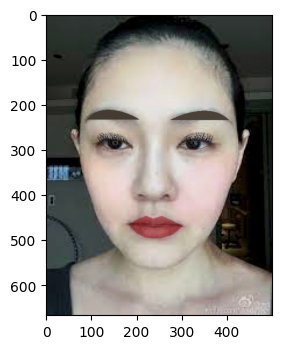

In [865]:
eye_lashesWarpedMask = eye_lashesAlphaWarped / 255

temp1 = np.multiply(targetImage, 1.0 - eye_lashesWarpedMask)
temp2 = np.multiply(eye_lashesWarped, eye_lashesWarpedMask)

out_eyelashes = temp1 + temp2

plt.subplot(122)
plt.imshow(out_eyelashes)
#plt.title("Image with Eye-Lashes")